In [1420]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

%config InlineBackend.figure_format = 'svg'
%matplotlib inline


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [1421]:
dataset_path = 'C:/Users/Станислав/Desktop/Обучение GB/Pandas/train.csv'
test_dataset_path = 'C:/Users/Станислав/Desktop/Обучение GB/Pandas/test.csv'
SkachkovSS_predictions = 'C:/Users/Станислав/Desktop/Обучение GB/Pandas/SkachkovSS_predictions.csv'

In [1422]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [1423]:
df = pd.read_csv(dataset_path, sep = ',')
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [1424]:
test_df = pd.read_csv(test_dataset_path, sep = ',')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [1425]:
df = df[df.columns[1:]]
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [1426]:
## проверка наличия пропусков

In [1427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Price  

In [1428]:
df.rename(columns = {'Helthcare_2':'Healthcare_2'}, inplace = True)
df

C:\Users\Станислав\AppData\Local\Temp\ipykernel_16684\2292207157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Helthcare_2':'Healthcare_2'}, inplace = True)


,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


In [1429]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [1430]:
test_df.rename(columns = {'Helthcare_2':'Healthcare_2'}, inplace = True)
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


In [1431]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

DistrictId - 0%
Rooms - 0%
Square - 0%
LifeSquare - 21%
KitchenSquare - 0%
Floor - 0%
HouseFloor - 0%
HouseYear - 0%
Ecology_1 - 0%
Ecology_2 - 0%
Ecology_3 - 0%
Social_1 - 0%
Social_2 - 0%
Social_3 - 0%
Healthcare_1 - 48%
Healthcare_2 - 0%
Shops_1 - 0%
Shops_2 - 0%
Price - 0%


In [1432]:
for col in test_df.columns:
    pct_missing = np.mean(test_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Id - 0%
DistrictId - 0%
Rooms - 0%
Square - 0%
LifeSquare - 21%
KitchenSquare - 0%
Floor - 0%
HouseFloor - 0%
HouseYear - 0%
Ecology_1 - 0%
Ecology_2 - 0%
Ecology_3 - 0%
Social_1 - 0%
Social_2 - 0%
Social_3 - 0%
Healthcare_1 - 48%
Healthcare_2 - 0%
Shops_1 - 0%
Shops_2 - 0%


In [1433]:
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['LifeSquare'].median()
len(df) - df.count()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Healthcare_2     0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [1434]:
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df['Healthcare_1'].median()
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = test_df['LifeSquare'].median()
len(test_df) - test_df.count()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Healthcare_2     0
Shops_1          0
Shops_2          0
dtype: int64

In [1435]:
df['Rooms'] = df['Rooms'].astype('int')
df['HouseFloor'] = df['HouseFloor'].astype('int')
df['Healthcare_1'] = df['Healthcare_1'].astype('int')
df['Healthcare_2'] = df['Healthcare_2'].astype('category')
df['Social_3'] = df['Social_3'].astype('category')
df['Ecology_2'] = df['Ecology_2'].astype('category')
df['Ecology_3'] = df['Ecology_3'].astype('category')
df['Shops_1'] = df['Shops_1'].astype('category')
df['Shops_2'] = df['Shops_2'].astype('category')

df['DistrictId'] = df['DistrictId'].astype('str')

C:\Users\Станислав\AppData\Local\Temp\ipykernel_16684\1331158294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rooms'] = df['Rooms'].astype('int')
C:\Users\Станислав\AppData\Local\Temp\ipykernel_16684\1331158294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HouseFloor'] = df['HouseFloor'].astype('int')
C:\Users\Станислав\AppData\Local\Temp\ipykernel_16684\1331158294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [1436]:
test_df['Rooms'] = test_df['Rooms'].astype('int')
test_df['HouseFloor'] = test_df['HouseFloor'].astype('int')
test_df['Healthcare_1'] = test_df['Healthcare_1'].astype('int')
test_df['Healthcare_2'] = test_df['Healthcare_2'].astype('category')
test_df['Social_3'] = test_df['Social_3'].astype('category')
test_df['Ecology_2'] = test_df['Ecology_2'].astype('category')
test_df['Ecology_3'] = test_df['Ecology_3'].astype('category')
test_df['Shops_1'] = test_df['Shops_1'].astype('category')
test_df['Shops_2'] = test_df['Shops_2'].astype('category')

test_df['DistrictId'] = test_df['DistrictId'].astype('str')

In [1437]:
df_num_features = df.select_dtypes(include = ['int32', 'int64','float64'])
df_num_features

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Healthcare_1,Price
0,2,47.981561,29.442751,6.0,7,9,1969,0.089040,33,7976,900,184966.930730
1,3,65.683640,40.049543,8.0,7,9,1978,0.000070,46,10309,240,300009.450063
2,2,44.947953,29.197612,0.0,8,12,1968,0.049637,34,7759,229,220925.908524
3,2,53.352981,52.731512,9.0,8,17,1977,0.437885,23,5735,1084,175616.227217
4,1,39.649192,23.776169,7.0,11,12,1976,0.012339,35,5776,2078,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,50.401785,30.476203,5.0,6,5,1968,0.135650,46,7960,350,196684.316040
9996,1,41.521546,20.539216,9.0,13,13,2000,0.000000,30,5562,900,189050.289571
9997,1,47.939008,32.781260,1.0,12,16,2015,0.072158,2,629,900,159143.805370
9998,2,43.602562,33.840147,8.0,1,5,1961,0.307467,30,5048,325,181595.339808


In [1438]:
df_num_features.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Healthcare_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,1026.358900,214138.857399
std,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,746.662828,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,59174.778028
25%,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,830.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,900.000000,192269.644879
75%,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,990.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,4849.000000,633233.466570


## Предобработка данных базы данных train 

<AxesSubplot:>

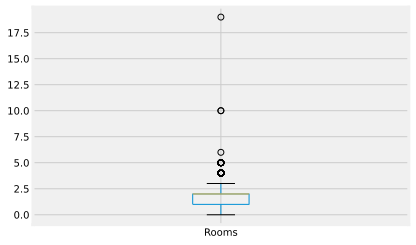

In [1439]:
df.boxplot(column=['Rooms'])

In [1440]:
df.loc[(df['Rooms'] > 3), 'Rooms'] = df['Rooms'].median()
df.loc[(df['Rooms'] == 0), 'Rooms'] = df['Rooms'].median()
df['Rooms'].value_counts()

2    4060
1    3705
3    2235
Name: Rooms, dtype: int64

<AxesSubplot:>

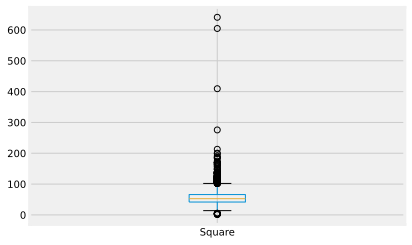

In [1441]:
df.boxplot(column=['Square'])

In [1442]:
df.loc[(df['Square'] > 98), 'Square'] = df['Square'].median()
df.loc[(df['Square'] < 15), 'Square'] = df['Square'].median()

<AxesSubplot:>

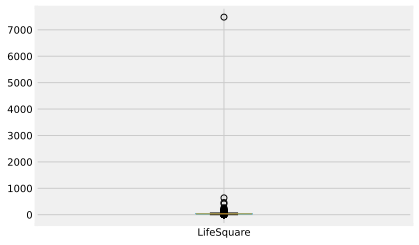

In [1443]:
df.boxplot(column=['LifeSquare'])

In [1444]:
df.loc[(df['LifeSquare'] > 100), 'LifeSquare'] = df['LifeSquare'].median()
df.loc[(df['LifeSquare'] < 10), 'LifeSquare'] = df['LifeSquare'].median()

In [1445]:
df.loc[(df['KitchenSquare'] > ((df['Square']) - (df['LifeSquare']))) & (df['KitchenSquare'] > 15.0), 'KitchenSquare'] = df['KitchenSquare'].median()
df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

<AxesSubplot:>

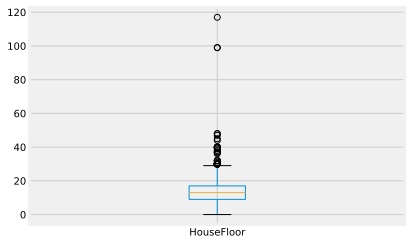

In [1446]:
df.boxplot(column=['HouseFloor'])

In [1447]:
df.loc[(df['HouseFloor']) == 0, 'HouseFloor'] = df['HouseFloor'].median()
df.loc[(df['HouseFloor']) > 30, 'HouseFloor'] = df['HouseFloor'].median()

In [1448]:
df[(df['Floor']) > (df['HouseFloor'])]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
7,74,2,80.312926,32.781260,3.0,14,13,1977,0.075779,B,B,6,1437,3,900,0,2,B,221244.156664
14,27,1,53.769097,52.408027,3.0,5,4,1977,0.072158,B,B,2,629,1,900,0,0,A,140647.565937
16,27,2,49.360648,31.993964,5.0,6,5,1983,0.051815,B,B,5,1227,0,900,0,0,B,117000.381287
21,27,2,64.711835,32.781260,3.0,15,1,1977,0.211401,B,B,9,1892,0,900,0,1,B,127200.026511
26,27,3,52.513310,32.781260,3.0,17,13,2018,0.072158,B,B,2,629,1,900,0,0,A,337299.867936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,52,3,64.074977,47.633428,6.0,11,9,1983,0.371149,B,B,34,7065,1,750,2,5,B,226434.880156
9985,27,1,38.968338,32.781260,3.0,10,1,1977,0.211401,B,B,9,1892,0,900,0,1,B,95529.569405
9989,96,3,90.055233,47.860231,11.0,26,24,2005,0.041116,B,B,53,14892,4,900,1,4,B,441108.911237
9991,3,3,52.513310,51.628780,12.0,18,17,2000,0.265089,B,B,37,5288,0,1937,3,2,B,212883.501504


In [1449]:
df.loc[(df['Floor']) > (df['HouseFloor']), 'Floor'] = df['HouseFloor']

In [1450]:
df['HouseYear'].sort_values(ascending=False)

1497    20052011
4189        4968
5701        2020
2493        2020
1499        2020
          ...   
7611        1916
910         1914
2656        1912
5111        1912
9317        1910
Name: HouseYear, Length: 10000, dtype: int64

In [1451]:
df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [1452]:
df_num_features = df.select_dtypes(include = ['int32', 'int64','float64'])
df_num_features.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Healthcare_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.853000,54.340950,35.433983,6.355500,7.897500,12.866900,1984.872400,0.118858,24.687000,5352.157400,1026.358900,214138.857399
std,0.756603,15.412484,13.467887,2.988882,5.130441,6.100304,18.416347,0.119025,17.532614,4006.799803,746.662828,92872.293865
min,1.000000,16.117154,10.523868,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,59174.778028
25%,1.000000,41.800063,27.654813,3.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,830.000000,153872.633942
50%,2.000000,52.513175,32.781260,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,900.000000,192269.644879
75%,2.000000,64.361026,41.052147,9.000000,11.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,990.000000,249135.462171
max,3.000000,97.937623,99.970065,29.000000,28.000000,30.000000,2020.000000,0.521867,74.000000,19083.000000,4849.000000,633233.466570


<AxesSubplot:>

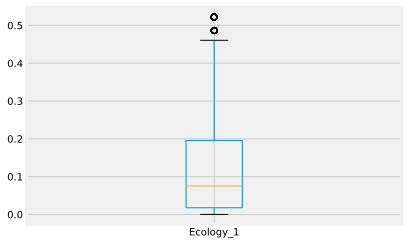

In [1453]:
df.boxplot(column=['Ecology_1'])

In [1454]:
df.loc[(df['Ecology_1']) > 0.48, 'Ecology_1'] = df['Ecology_1'].median()

<AxesSubplot:>

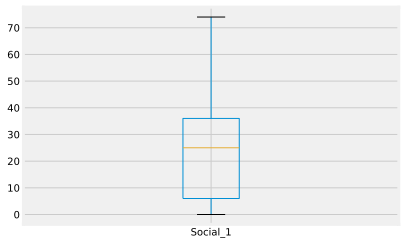

In [1455]:
df.boxplot(column=['Social_1'])

<AxesSubplot:>

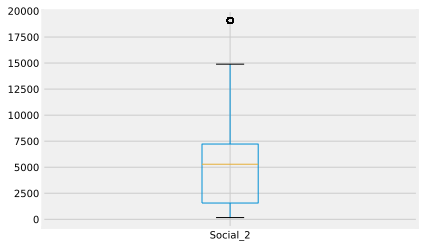

In [1456]:
df.boxplot(column=['Social_2'])

In [1457]:
df.loc[(df['Social_2']) > 17500, 'Social_2'] = df['Social_2'].median()

In [1458]:
df['Ecology_3_bin'] = df['Ecology_3'].replace({'A':0, 'B':1})
df['Ecology_2_bin'] = df['Ecology_2'].replace({'A':0, 'B':1})
df['Shops_2_bin'] = df['Shops_2'].replace({'A':0, 'B':1})

In [1459]:
## Предобработка данных базы данных test

<AxesSubplot:>

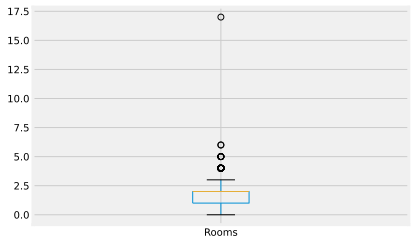

In [1460]:
test_df.boxplot(column=['Rooms'])

In [1461]:
test_df.loc[(test_df['Rooms'] > 3), 'Rooms'] = test_df['Rooms'].median()
test_df.loc[(test_df['Rooms'] == 0), 'Rooms'] = test_df['Rooms'].median()
test_df['Rooms'].value_counts()

2    2132
1    1769
3    1099
Name: Rooms, dtype: int64

<AxesSubplot:>

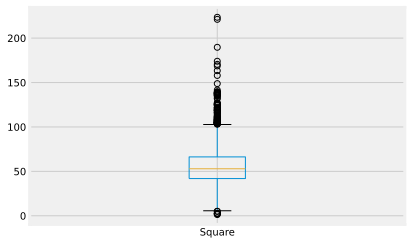

In [1462]:
test_df.boxplot(column=['Square'])

In [1463]:
test_df.loc[(test_df['Square'] > 98), 'Square'] = test_df['Square'].median()
test_df.loc[(test_df['Square'] < 10), 'Square'] = test_df['Square'].median()

In [1464]:
test_df.loc[(test_df['LifeSquare'] > 65), 'LifeSquare'] = test_df['LifeSquare'].median()
test_df.loc[(test_df['LifeSquare'] < 10), 'LifeSquare'] = df['LifeSquare'].median()

In [1465]:
test_df.loc[(test_df['KitchenSquare'] > ((test_df['Square']) - (test_df['LifeSquare']))) & (test_df['KitchenSquare'] > 15.0), 'KitchenSquare'] = test_df['KitchenSquare'].median()
test_df.loc[test_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

<AxesSubplot:>

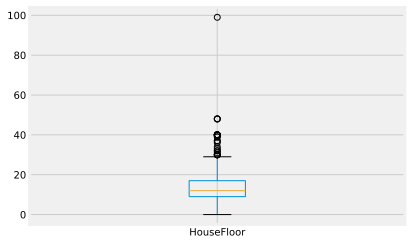

In [1466]:
test_df.boxplot(column=['HouseFloor'])

In [1467]:
test_df.loc[(test_df['Floor']) > (test_df['HouseFloor']), 'Floor'] = test_df['HouseFloor']

In [1468]:
test_df['HouseYear'].sort_values(ascending=False)

385     2020
888     2020
4273    2020
1275    2020
3382    2020
        ... 
1475    1912
64      1911
2691    1910
2       1909
3253    1908
Name: HouseYear, Length: 5000, dtype: int64

<AxesSubplot:>

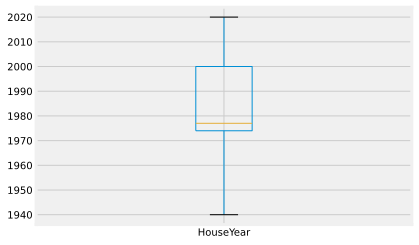

In [1469]:
test_df.loc[(test_df['HouseYear'] < 1940), 'HouseYear'] = test_df['HouseYear'].median()
test_df.boxplot(column=['HouseYear'])

In [1470]:
test_df.loc[(test_df['Ecology_1']) > 0.46, 'Ecology_1'] = test_df['Ecology_1'].median()

<AxesSubplot:>

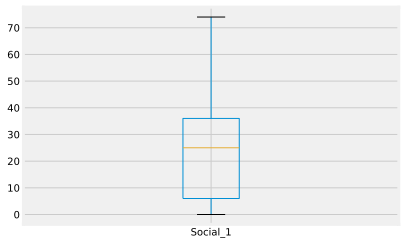

In [1471]:
test_df.boxplot(column=['Social_1'])

In [1472]:
test_df.loc[(test_df['Social_2']) > 17500, 'Social_2'] = test_df['Social_2'].median()

In [1473]:
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace({'A':0, 'B':1})
test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A':0, 'B':1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A':0, 'B':1})

In [1474]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price,Ecology_3_bin,Ecology_2_bin,Shops_2_bin
0,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,B,...,7976,5,900,0,11,B,184966.930730,1,1,1
1,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,B,...,10309,1,240,1,16,B,300009.450063,1,1,1
2,53,2,44.947953,29.197612,3.0,8,12,1968,0.049637,B,...,7759,0,229,1,3,B,220925.908524,1,1,1
3,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,B,...,5735,3,1084,0,5,B,175616.227217,1,1,1
4,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,B,...,5776,1,2078,2,4,B,150226.531644,1,1,1


In [1475]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Ecology_3_bin,Ecology_2_bin,Shops_2_bin
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,...,11,2748,1,900,0,0,B,1,1,1
1,15856,74,2,69.263183,32.925087,3.0,1,1,1977,0.075779,...,6,1437,3,900,0,2,B,1,1,1
2,5480,190,1,13.597819,15.948246,12.0,2,5,1977,0.000000,...,30,7538,87,4702,5,5,B,1,1,1
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,...,23,4583,3,900,3,3,B,1,1,1
4,14275,27,1,47.527111,43.387569,3.0,17,17,2017,0.072158,...,2,629,1,900,0,0,A,1,1,0


In [1476]:
## добавление признаков

In [1477]:
district_size = df['DistrictId'].value_counts().reset_index().rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [1478]:
df = df.merge(district_size, on='DistrictId', how='left')
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price,Ecology_3_bin,Ecology_2_bin,Shops_2_bin,DistrictSize
0,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,B,...,5,900,0,11,B,184966.930730,1,1,1,22
1,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,B,...,1,240,1,16,B,300009.450063,1,1,1,87
2,53,2,44.947953,29.197612,3.0,8,12,1968,0.049637,B,...,0,229,1,3,B,220925.908524,1,1,1,174
3,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,B,...,3,1084,0,5,B,175616.227217,1,1,1,179
4,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,B,...,1,2078,2,4,B,150226.531644,1,1,1,97


In [1479]:
(df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [1480]:
df['IsDistrictLarge'] = (df['DistrictSize'] > 100).astype(int)

In [1481]:
med_square_by_district = df.groupby(['DistrictId', 'Ecology_1'], as_index=False).agg({'Square':'median'}).rename(columns={'Square':'MedSquareByDistrict'})
med_square_by_district

,DistrictId,Ecology_1,MedSquareByDistrict
0,0,0.006076,56.724377
1,0,0.319809,45.662268
2,1,0.007122,61.734561
3,1,0.014581,45.264259
4,1,0.025609,55.918787
...,...,...,...
424,98,0.089040,60.858730
425,98,0.195781,49.065920
426,98,0.313925,30.447688
427,99,0.012339,46.839067


In [1482]:
df=df.merge(med_square_by_district, on=['DistrictId', 'Ecology_1'], how='left')
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Healthcare_2,Shops_1,Shops_2,Price,Ecology_3_bin,Ecology_2_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedSquareByDistrict
0,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,B,...,0,11,B,184966.930730,1,1,1,22,0,47.637659
1,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,B,...,1,16,B,300009.450063,1,1,1,87,0,54.015400
2,53,2,44.947953,29.197612,3.0,8,12,1968,0.049637,B,...,1,3,B,220925.908524,1,1,1,174,1,56.180325
3,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,B,...,0,5,B,175616.227217,1,1,1,179,1,53.019158
4,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,B,...,2,4,B,150226.531644,1,1,1,97,0,46.839067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2,50.401785,30.476203,5.0,5,5,1968,0.135650,B,...,3,11,B,196684.316040,1,1,1,34,0,47.286394
9996,18,1,41.521546,20.539216,9.0,13,13,2000,0.000000,B,...,0,5,A,189050.289571,1,1,0,51,0,51.796510
9997,27,1,47.939008,32.781260,3.0,12,16,2015,0.072158,B,...,0,0,A,159143.805370,1,1,0,851,1,58.028722
9998,75,2,43.602562,33.840147,8.0,1,5,1961,0.307467,B,...,2,5,B,181595.339808,0,1,1,66,0,48.525505


In [1483]:
df = df.merge(square_size, on='Square', how='left')
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Shops_1,Shops_2,Price,Ecology_3_bin,Ecology_2_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedSquareByDistrict,SquareSize
0,35,2,47.981561,29.442751,6.0,7,9,1969,0.089040,B,...,11,B,184966.930730,1,1,1,22,0,47.637659,1
1,41,3,65.683640,40.049543,8.0,7,9,1978,0.000070,B,...,16,B,300009.450063,1,1,1,87,0,54.015400,1
2,53,2,44.947953,29.197612,3.0,8,12,1968,0.049637,B,...,3,B,220925.908524,1,1,1,174,1,56.180325,1
3,58,2,53.352981,52.731512,9.0,8,17,1977,0.437885,B,...,5,B,175616.227217,1,1,1,179,1,53.019158,1
4,99,1,39.649192,23.776169,7.0,11,12,1976,0.012339,B,...,4,B,150226.531644,1,1,1,97,0,46.839067,1


In [1484]:
#med_price_by_square = df.groupby(['Square'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceSquare'})

In [1485]:
#df = df.merge(med_price_by_square, on=['Square'], how='left')
#df.head()

In [1486]:
## работа с тестовой базой

In [1487]:
test_district_size = test_df['DistrictId'].value_counts().reset_index().rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
test_district_size.head()

,DistrictId,DistrictSize
0,27,391
1,1,344
2,23,264
3,6,257
4,9,132


In [1488]:
test_df = test_df.merge(test_district_size, on='DistrictId', how='left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Ecology_3_bin,Ecology_2_bin,Shops_2_bin,DistrictSize
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,...,2748,1,900,0,0,B,1,1,1,91
1,15856,74,2,69.263183,32.925087,3.0,1,1,1977,0.075779,...,1437,3,900,0,2,B,1,1,1,61
2,5480,190,1,13.597819,15.948246,12.0,2,5,1977,0.000000,...,7538,87,4702,5,5,B,1,1,1,2
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,...,4583,3,900,3,3,B,1,1,1,49
4,14275,27,1,47.527111,43.387569,3.0,17,17,2017,0.072158,...,629,1,900,0,0,A,1,1,0,391


In [1489]:
(test_df['DistrictSize'] > 100).value_counts()

False    3375
True     1625
Name: DistrictSize, dtype: int64

In [1490]:
test_df['IsDistrictLarge'] = (test_df['DistrictSize'] > 100).astype(int)
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Ecology_3_bin,Ecology_2_bin,Shops_2_bin,DistrictSize,IsDistrictLarge
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,...,1,900,0,0,B,1,1,1,91,0
1,15856,74,2,69.263183,32.925087,3.0,1,1,1977,0.075779,...,3,900,0,2,B,1,1,1,61,0
2,5480,190,1,13.597819,15.948246,12.0,2,5,1977,0.000000,...,87,4702,5,5,B,1,1,1,2,0
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,...,3,900,3,3,B,1,1,1,49,0
4,14275,27,1,47.527111,43.387569,3.0,17,17,2017,0.072158,...,1,900,0,0,A,1,1,0,391,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3,67.133911,50.809797,6.0,5,9,1973,0.000170,...,0,900,1,1,B,1,1,1,45,0
4996,4695,1,1,40.198472,21.807061,10.0,12,17,2017,0.007122,...,0,900,0,1,B,1,1,1,344,1
4997,5783,12,3,77.842178,48.282625,9.0,22,22,1989,0.090799,...,2,900,5,15,B,1,1,1,36,0
4998,4780,62,2,81.305222,32.925087,3.0,0,0,1977,0.072158,...,1,900,0,0,A,1,1,0,122,1


In [1491]:
#test_df = test_df.merge(med_price_by_square, on='Square', how='left')

In [1492]:
test_med_square_by_district = test_df.groupby(['DistrictId', 'Ecology_1'], as_index=False).agg({'Square':'median'}).rename(columns={'Square':'MedSquareByDistrict'})
test_med_square_by_district

,DistrictId,Ecology_1,MedSquareByDistrict
0,0,0.006076,45.228004
1,0,0.319809,46.312414
2,1,0.007122,62.785095
3,1,0.014581,51.923405
4,1,0.025609,62.929994
...,...,...,...
382,97,0.306977,85.846510
383,98,0.089040,54.686071
384,98,0.195781,54.777873
385,99,0.012339,46.758011


In [1493]:
test_df=test_df.merge(test_med_square_by_district, on=['DistrictId', 'Ecology_1'], how='left')
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Ecology_3_bin,Ecology_2_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedSquareByDistrict
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,...,900,0,0,B,1,1,1,91,0,52.505322
1,15856,74,2,69.263183,32.925087,3.0,1,1,1977,0.075779,...,900,0,2,B,1,1,1,61,0,56.769916
2,5480,190,1,13.597819,15.948246,12.0,2,5,1977,0.000000,...,4702,5,5,B,1,1,1,2,0,30.891883
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,...,900,3,3,B,1,1,1,49,0,53.967719
4,14275,27,1,47.527111,43.387569,3.0,17,17,2017,0.072158,...,900,0,0,A,1,1,0,391,1,52.921340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3,67.133911,50.809797,6.0,5,9,1973,0.000170,...,900,1,1,B,1,1,1,45,0,56.126719
4996,4695,1,1,40.198472,21.807061,10.0,12,17,2017,0.007122,...,900,0,1,B,1,1,1,344,1,62.785095
4997,5783,12,3,77.842178,48.282625,9.0,22,22,1989,0.090799,...,900,5,15,B,1,1,1,36,0,54.594473
4998,4780,62,2,81.305222,32.925087,3.0,0,0,1977,0.072158,...,900,0,0,A,1,1,0,122,1,52.921340


In [1494]:
test_square_size = test_df['Square'].value_counts().reset_index().rename(columns={'index':'Square', 'Square':'SquareSize'})
test_square_size.head()

,Square,SquareSize
0,52.921340,148
1,52.919578,8
2,49.882643,1
3,65.503990,1
4,57.600194,1


In [1495]:
test_df = test_df.merge(test_square_size, on='Square', how='left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_2,Shops_1,Shops_2,Ecology_3_bin,Ecology_2_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedSquareByDistrict,SquareSize
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,...,0,0,B,1,1,1,91,0,52.505322,1
1,15856,74,2,69.263183,32.925087,3.0,1,1,1977,0.075779,...,0,2,B,1,1,1,61,0,56.769916,1
2,5480,190,1,13.597819,15.948246,12.0,2,5,1977,0.000000,...,5,5,B,1,1,1,2,0,30.891883,1
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,...,3,3,B,1,1,1,49,0,53.967719,1
4,14275,27,1,47.527111,43.387569,3.0,17,17,2017,0.072158,...,0,0,A,1,1,0,391,1,52.921340,1


In [1496]:
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_2,Shops_1,Shops_2,Ecology_3_bin,Ecology_2_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedSquareByDistrict,SquareSize
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,...,0,0,B,1,1,1,91,0,52.505322,1
1,15856,74,2,69.263183,32.925087,3.0,1,1,1977,0.075779,...,0,2,B,1,1,1,61,0,56.769916,1
2,5480,190,1,13.597819,15.948246,12.0,2,5,1977,0.000000,...,5,5,B,1,1,1,2,0,30.891883,1
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,...,3,3,B,1,1,1,49,0,53.967719,1
4,14275,27,1,47.527111,43.387569,3.0,17,17,2017,0.072158,...,0,0,A,1,1,0,391,1,52.921340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3,67.133911,50.809797,6.0,5,9,1973,0.000170,...,1,1,B,1,1,1,45,0,56.126719,1
4996,4695,1,1,40.198472,21.807061,10.0,12,17,2017,0.007122,...,0,1,B,1,1,1,344,1,62.785095,1
4997,5783,12,3,77.842178,48.282625,9.0,22,22,1989,0.090799,...,5,15,B,1,1,1,36,0,54.594473,1
4998,4780,62,2,81.305222,32.925087,3.0,0,0,1977,0.072158,...,0,0,A,1,1,0,122,1,52.921340,1


In [1497]:
df.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Healthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_3_bin',
 'Ecology_2_bin',
 'Shops_2_bin',
 'DistrictSize',
 'IsDistrictLarge',
 'MedSquareByDistrict',
 'SquareSize']

In [1498]:
test_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Healthcare_2',
 'Shops_1',
 'Shops_2',
 'Ecology_3_bin',
 'Ecology_2_bin',
 'Shops_2_bin',
 'DistrictSize',
 'IsDistrictLarge',
 'MedSquareByDistrict',
 'SquareSize']

In [1499]:
df.shape, test_df.shape

((10000, 26), (5000, 26))

In [1500]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Healthcare_2', 'Shops_1', 'Shops_2_bin']

new_feature_names = ['DistrictSize', 'IsDistrictLarge', 'SquareSize', 'MedSquareByDistrict']#,'MedPriceSquare']

target_name = "Price"

In [1501]:
##разбиение на train и test

In [1502]:
x = df[feature_names + new_feature_names]
y = df[target_name]

In [1503]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True, random_state=21)

In [1504]:
##построение модели

In [1505]:
rf_model = RandomForestRegressor(random_state=21)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=21)

Train R2:	0.962
Test R2:	0.73


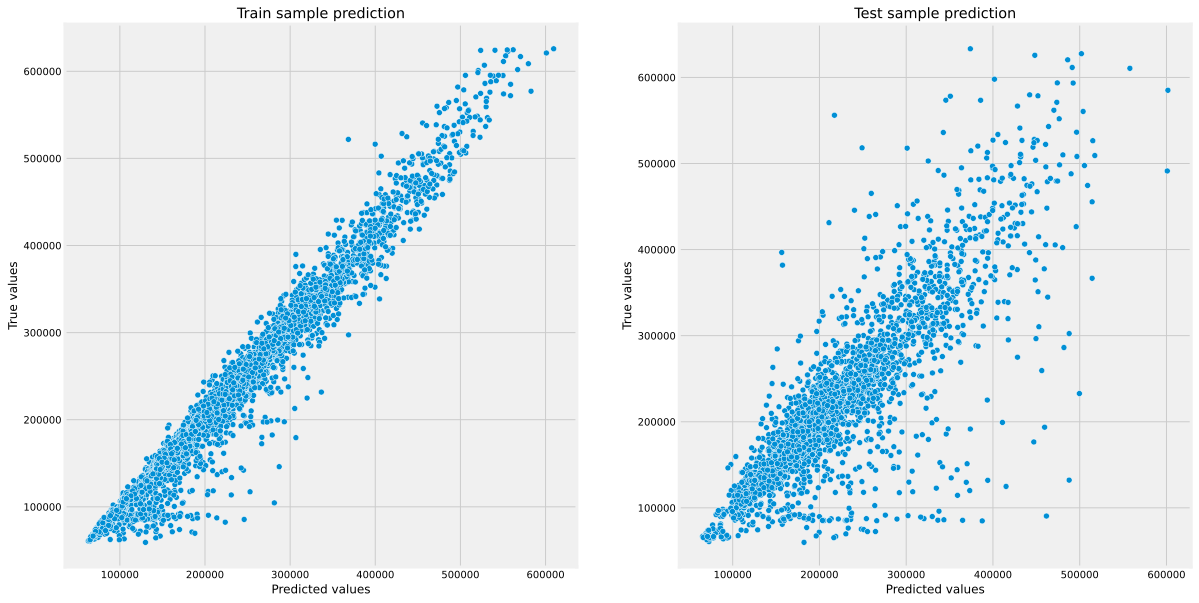

In [1506]:
y_train_preds = rf_model.predict(x_train)
y_test_preds = rf_model.predict(x_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [1507]:
cv_score = cross_val_score(rf_model, x, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.72622392, 0.7249072 , 0.73843957])

In [1508]:
cv_score.mean()

0.7298568976852716

In [1509]:
test_features = list(x_train.columns)

In [1510]:
test_df[test_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Rooms                5000 non-null   int32   
 1   Square               5000 non-null   float64 
 2   LifeSquare           5000 non-null   float64 
 3   KitchenSquare        5000 non-null   float64 
 4   Floor                5000 non-null   int64   
 5   HouseFloor           5000 non-null   int32   
 6   HouseYear            5000 non-null   int64   
 7   Ecology_1            5000 non-null   float64 
 8   Ecology_2_bin        5000 non-null   category
 9   Ecology_3_bin        5000 non-null   category
 10  Social_1             5000 non-null   int64   
 11  Social_2             5000 non-null   int64   
 12  Social_3             5000 non-null   category
 13  Healthcare_1         5000 non-null   int32   
 14  Healthcare_2         5000 non-null   category
 15  Shops_1              

In [1511]:
test_df['Price'] = rf_model.predict(test_df[test_features])

In [1512]:
test_df[['Id', 'Price']].to_csv(SkachkovSS_predictions, sep=',', index=False, encoding='utf-8')